# Exploring Twitter data
In this notebook, we are going to explore our cleaned dataset that we have created in the first notebook.

We are going to do some exploratory analysis in order to understand the shape of the data, patterns and values, correlations between features, and hidden meaning behind our data.

## Goal: 
Learn some common aspects of data exploration, calculate some statistics and visualize data column by column.

## Introduction to exploratory data analysis
[Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. (Wikipedia)


### Data exploration process:
 - Computing summary statistics
 - Plotting
 - Additional wrangling if needed.

## Load python modules

Load python libraries first. Additional libraries that we are going to use in this notebook are: 
 - [wordcloud](https://amueller.github.io/word_cloud/) -  used to create wordclouds in Python
 - [nltk](https://www.nltk.org/) - natural language toolkit, library to work with language.
 - [folium](https://python-visualization.github.io/folium/) - library for creating maps.

In [1]:
try:
    import urllib.request
except ImportError:
    !pip install  --user  urllib
    import urllib.request
    
try:
    import pandas as pd
except ImportError:
    !pip install  --user  pandas
    import pandas as pd
    
try:
    from wordcloud import WordCloud
except ImportError:
    !pip install  --user wordcloud
    from wordcloud import WordCloud
    
try:
    import matplotlib
    import matplotlib.pyplot as plt
except ImportError:
    !pip install  --user matplotlib
    import matplotlib
    import matplotlib.pyplot as plt

%matplotlib inline

try:
    import nltk
except ImportError:
    !pip install  --user nltk
    import nltk

try:
    import folium
    from folium.plugins import MarkerCluster
except ImportError:
    !pip install  --user folium
    import folium
    from folium.plugins import MarkerCluster

#### First, we will download the cleaned dataset from object storage and display the first 5 rows

There is a copy of the cleaned dataset we just created saved to object store. You can download it or use your local copy, created in the first notebook.
We will read the csv file into pandas dataframe and print the first 5 rows.

In [2]:
target_url="https://swift-yeg.cloud.cybera.ca:8080/v1/AUTH_233e84cd313945c992b4b585f7b9125d/geeky-summit/alberta_tweets_cleaned_feb_25.csv"

file_name="alberta_tweets_cleaned_feb_25.csv"

 ## comment out this line to use your local copy 
urllib.request.urlretrieve(target_url, file_name)
## reading 'created_at_date' column as timestamp

tweets_cleaned = pd.read_csv(file_name, parse_dates=['created_at_date']) 

#timezone needs to be converted again
tweets_cleaned.created_at_date= tweets_cleaned.created_at_date.dt.tz_convert('MST') 
tweets_cleaned.head()

,created_at_date,hashtags_string,user_string,user_location,longitude,latitude,name,screen_name,extended_tweet,extended_tweet_cleaned
0,2019-02-25 11:41:39-07:00,,Mbone49ers,Canada,NaN,NaN,Chris (Iron 3-0),LeafsBottleGang,@Mbone49ers He could make a pile in midget wre...,@Mbone49ers He could make a pile in midget wre...
1,2019-02-25 11:42:11-07:00,,AbsCoverage,"Calgary, AB",NaN,NaN,Dave,PrismaticHab,@AbsCoverage To play 4C?,@AbsCoverage To play 4C?
2,2019-02-25 11:44:24-07:00,,deadmau5 PizzaCat_BL,"Mars, Canada",NaN,NaN,Sölus-Sun,solus_sun,@deadmau5 or @pizzacat_bl YOU CHOOSE!,@deadmau5 or @pizzacat_bl \nYOU CHOOSE!\n
3,2019-02-25 11:44:41-07:00,,BloomTaxonomy,I mute with reckless abandon. #INTJ,NaN,NaN,Under the Radar,retail_recruit,@BloomTaxonomy Not at all...read the first par...,@BloomTaxonomy Not at all...read the first par...
4,2019-02-25 11:44:47-07:00,,FFANillyKFox,Canada,NaN,NaN,WinterOOF,WinterFloof,@FFANillyKFox y u bully me?,@FFANillyKFox y u bully me?


## Data Exploration

#### We will explore the data column by column 
A couple of things to keep in mind while doing this is what are we expecting from the data? Are our observations consistent with these expectations? If not, why do they not line up? Are there any trends, outliers, or interesting observations to make note of? 

### `extended_tweet_cleaned` column

Let's begin with this column as this is likely the most interesting one to us. It contains all the text data tweeted out in each tweet. We would like to analyze this further. One way to examine the tweets is by looking at word frequencies. This could be done by using a bar chart or alternatively, using a word cloud. 

As you might imagine, if  we just go ahead and create a word cloud, it will be dominated by some very commonly used words, such as "the", "or", "and", etc. In order to prevent these common words from dominating the plot, we will remove them. Commonly used words that don't add anything contextually interesting such as this are called "stopwords". The wordcloud package that we will be using has a pre-built list of stopwords. 

Let's import them and examine:

In [3]:
from wordcloud import  STOPWORDS
print(STOPWORDS)

{'what', 'r', 'into', 'is', 'they', 'up', 'herself', "i'm", "wasn't", 'yourselves', 'shall', 'her', 'been', 'its', 'once', 'would', "we'll", 'does', "let's", "we'd", "how's", 'here', "here's", "they'll", 'while', 'both', 'until', 'these', 'because', 'should', 'down', "they're", 'just', 'was', 'yours', 'him', 'how', 'com', 'during', 'where', 'had', 'more', "you'd", "you'll", 'such', 'a', 'otherwise', 'doing', 'however', 'but', 'she', 'no', 'ever', 'ought', 'am', 'else', 'few', 'could', "we're", 'and', "who's", "we've", 'from', 'over', "haven't", 'which', 'by', 'at', 'there', 'myself', 'my', "wouldn't", "i'll", 'then', 'are', 'being', 'themselves', 'also', 'those', 'of', 'on', 'so', "didn't", 'get', 'that', "you've", 'i', "there's", 'you', 'www', "they'd", 'same', 'having', 'for', "i'd", 'it', "aren't", "i've", 'before', 'like', 'the', 'whom', 'all', 'hers', 'out', 'his', 'we', "you're", "don't", 'your', 'most', 'have', 'below', 'as', 'an', 'some', 'ourselves', "she's", 'against', 'did',

Now we'll use the [WordCloud()](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud) function from the wordcloud library.

In [4]:
stopwords = set(STOPWORDS)

#In the following function, random_state is set for reproducibility and collocation=False means 
#that if the same word is encountered in collocation with different words,
#it is still considered as one word (to remove duplicates)
def wordcloud(tweets,col):
    wordcloud = WordCloud(width=800, height=400,collocations=False,background_color="white",stopwords=stopwords,random_state = 2018).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off") 

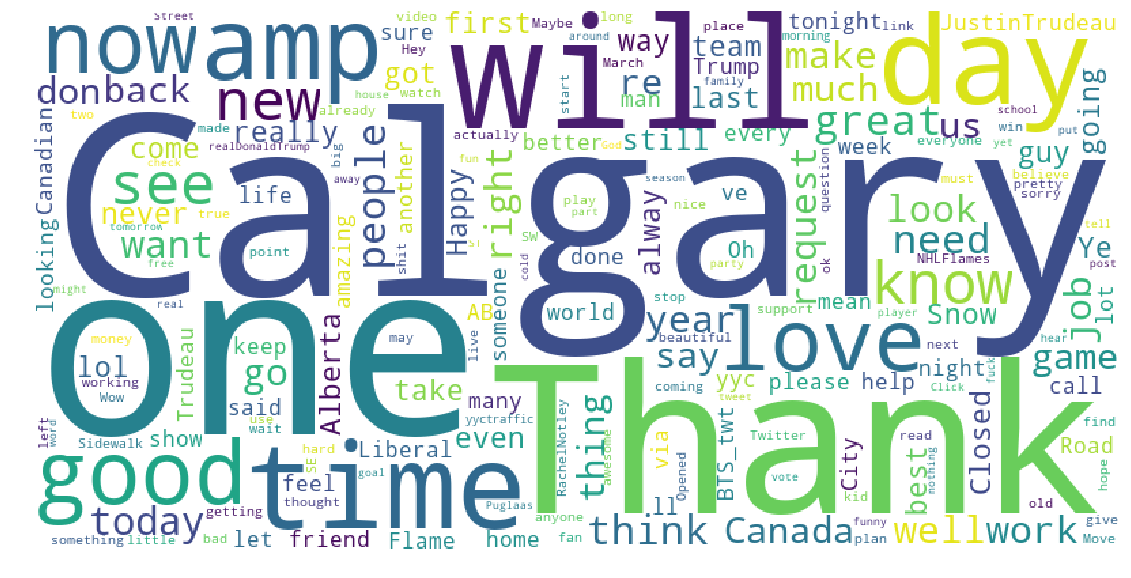

In [5]:
wordcloud(tweets_cleaned,'extended_tweet_cleaned')


All these words make a lot of sense, except for... amp?? Let's find some sample tweets that will allows us to inspect them why people might be tweeting about amps. 

In [6]:
pd.set_option('max_colwidth', 700)
tweets_cleaned[tweets_cleaned['extended_tweet_cleaned'].str.contains("amp")]['extended_tweet_cleaned'].head(10)

10           @flamesstamps Tampa is the 4th shortest and 9th lightest, they’ll be fine.  I expect the same from the Flames.\nGrit… 
19                                          Buckle-up for the best little piece of the Calgary Stampede you’ll take home this year 
28        I was raised by my mom &amp; dad, actually. But unlike you guys, I was raised not to treat women the way you do. Idk wh… 
46                CanadianBeats Passport - IN PHOTOS - @theproudimage covered @SnoopDogg @regulator &amp; Bone Thugs-N-Harmony in… 
55      Talk about a house that has everything, both inside &amp; outside! 🙌🏼 backyardgoals\n.\n📍104 LYNX RIDGE ROAD NW\nLYNX RID… 
93         yyctraffic ABRoads   Boxes &amp; styrofoam are lurking on Deerfoot Trail approaching 32nd Avenue NE.\nThey're in the S… 
111             yyctraffic SUV with flat tire at end of ramp from NB Crowchild Trail onto EB Glenmore Trail--partially blocked in… 
172           yyctraffic Still have a stall on ramp from NB Deerfoot onto WB

It appears that &amp is just a shortcut for ampersand. This is a bit misleading and so let's delete all the &amp occurences from the 'extended_tweet_cleaned' column. 

What would be another way of dealing with the confusing &amp text? 

In [7]:
tweets_cleaned['extended_tweet_cleaned']=tweets_cleaned['extended_tweet_cleaned'].str.replace('&amp',' ')

#### Exclude "one" and "will" words
"one" and "will" words can possibly be excluded as well, they don't have any special meaning. In this case, we'll add them to the list of stop words.

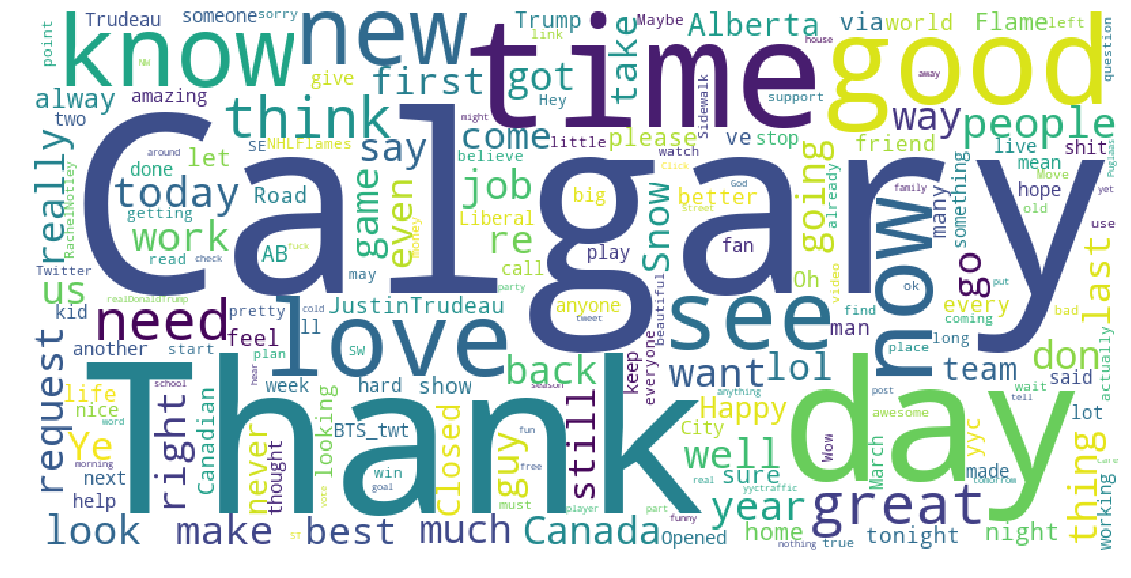

In [8]:
stopwords.add("one")
stopwords.add("will")
wordcloud(tweets_cleaned,'extended_tweet_cleaned')

#### Exercise1: add Calgary and AB (or other words as you like) to stowords to exclude them from wordcloud and try plotting the wordcloud again.

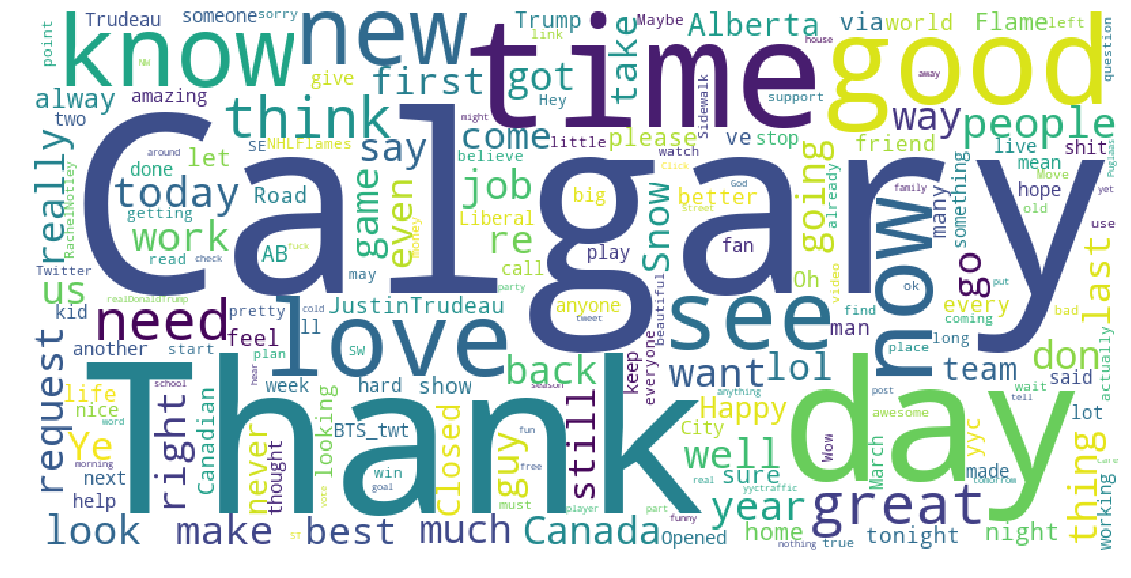

In [9]:
### type something here

###
wordcloud(tweets_cleaned,'extended_tweet_cleaned')

OK - this word cloud looks more sensible. What picture emerges from this? Are there any  themes we can identify? People seem to be discussing Christmas, year, and something about time - maybe mentioning a good time? While we can guess at some of these aspects, it's impossible to say anything about the context these words occur in. For that, we would need some more sophisticated analyses. This could include aspects like n-gram analysis or topic modelling, which is what we will take a look at in the next notebook. 

### `Created_at_date` column
This column is of type Timestamp. 
The following [features](https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/) can be useful for working with the Timestamp format:
 - **dt.year** returns the year of the date time.
 - **dt.month** returns the month of the date time.
 - **dt.day** returns the day of the date time.
 - **dt.hour** returns the hour of the date time.
 - **dt.minute** returns the minute of the date time.
   
 Min/max functions can be used with timestamp as well.   
   
 Let's find out the time range first:

In [10]:
print("Time range: ",min(tweets_cleaned["created_at_date"]),"-",max(tweets_cleaned["created_at_date"]))

Time range:  2019-02-25 11:41:39-07:00 - 2019-03-04 10:25:26-07:00


We have data from February 25th to March 4th.
#### Let's group by day and calculate the number of tweets for each day.

We will use the [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html), which is a pandas function that groups rows into groups based on one or multiple columns.

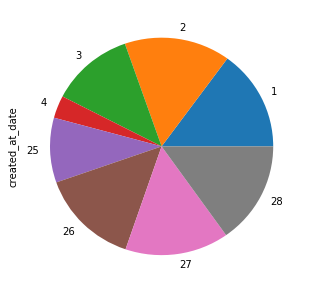

In [11]:
plt.figure(figsize=(5,5))
tweets_cleaned["created_at_date"].groupby(tweets_cleaned["created_at_date"].dt.day).count().plot(kind="pie")

This pie chart shows the proportion of tweets per day. The number on the circle corresponds to one of the days the data was collected. 

Another way to plot this is as a bar chart: 

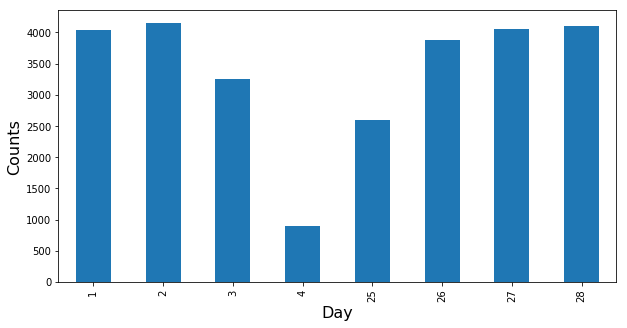

In [12]:
ax = tweets_cleaned["created_at_date"].groupby([tweets_cleaned["created_at_date"].dt.day]).count().plot(kind="bar", figsize=(10,5))
ax.set_xlabel("Day", size =16)
ax.set_ylabel("Counts", size=16)
plt.show()

It looks like the most tweets took place on March 2nd. Let's confirm that and check out some additional summary stats. 

In [13]:
print("Total number of tweets: ",
      tweets_cleaned.shape[0])

print("Number of tweets collected on March 2nd: ", 
      tweets_cleaned.loc[tweets_cleaned["created_at_date"].dt.day==2].shape[0])


Total number of tweets:  27006
Number of tweets collected on March 2nd:  4149


#### Let's take a look at the number of tweets by hour of day and whether this make sense with what we expect. What kind of pattern would you expect? 
 
#### Exercise2: Using the same methodology as for the bar chart above, can you plot the number of tweets by hour? 

In [14]:
## type something here


######################

In [15]:
print("Total number of tweets collected between 03:00 and 04:00: ", 
      tweets_cleaned["created_at_date"].groupby([tweets_cleaned["created_at_date"].dt.hour]).count()[3])

print("Total number of tweets collected between 18:00 and 19:00: ", 
      tweets_cleaned["created_at_date"].groupby([tweets_cleaned["created_at_date"].dt.hour]).count()[18])


Total number of tweets collected between 03:00 and 04:00:  152
Total number of tweets collected between 18:00 and 19:00:  1841


#### Exercise3: plot tweets number by day and hour 
Hint1: for two conditions in groupby() function use list format []
>instead of groupby([value]) use groupby([value1,value2]) 

Hint2: Use figsize=(20,10) to make larger plot:

In [16]:
## type something here


######################

OK - so far everything looks as we expected it for when the tweets were collected and at which time of day users were  most active. Let's move on to the next column. 

### `Hashtag_string`  and `user_string` columns
These two columns are of type String and have a list of hastags/user mentions separated by a blank.  
We will create a list of all the hashtags first using the [join()](https://www.tutorialspoint.com/python/string_join.htm) and [split()](https://www.w3schools.com/python/ref_string_split.asp) functions. 

In [17]:
all_hashtags=" ".join([i for i in tweets_cleaned['hashtags_string']]).split()
print(all_hashtags)

['believing', 'ResignLisaMacCleod', 'ResignLisaMacCleod', 'dictators', 'Calgary', 'MATCHA', 'CanadianBeats', 'Passport', 'backyardgoals', 'Finance', 'Calgary', 'Edmonton', 'glutenfree', 'Deafblind', 'AntifaDreams', 'Flames', 'Repost', 'NeverGiveUp', 'NeverSurrender', 'AntifaReality', 'FlagshipFebruary', 'greatabbeerrace2019', 'craftbeer', 'yyc', 'wireless', 'Calgary', 'yyctraffic', 'ABRoads', 'Hospitality', 'Calgary', 'MondayMotivation', 'decor', 'decorations', 'DearFutureSelf', 'Habs', 'IT', 'yyctraffic', 'LearnToCode', 'yyc', 'polarvortex', 'iswinteroveryet', 'MrShawarma', 'qualityhairbylawlar', 'yyctraffic', 'Carpool', 'Calgary', 'Banff', 'sharemusic', 'sharefood', 'sustainablecontrol', 'cjmlearns', 'TheVerdict', 'TheVerdict', 'NigeriaDecides2019', 'channelstv', 'pumpitup', 'Flames', 'NHLTrade', 'yyctraffic', 'Venezuela', 'Politics', 'yycbike', 'yyctraffic', 'Bravo', 'creepy', 'Flames', 'NHLTrade', 'Flames', 'NHLTrade', 'TradeCentre', 'Murica', 'flames', 'Flames', 'NHLTrade', 'Flame

Then we use the [FreqDist()](https://kite.com/python/docs/nltk.probability.FreqDist) function from nltk library to get frequence distribution for all the words.  That is, this function will count how many times each hashtag occurs. 

In [18]:
freque_dist=nltk.FreqDist(all_hashtags)
print("Most common hashtags: ",freque_dist.most_common(20)) ## most_common(n) function prints top n words with highest frequencies

Most common hashtags:  [('Calgary', 210), ('yyc', 195), ('yyctraffic', 154), ('Flames', 113), ('Habs', 63), ('cdnpoli', 60), ('TwitterBestFandom', 54), ('YYC', 48), ('TeamBTS', 48), ('calgary', 47), ('ThankYouIggy', 38), ('Flames1stGoal', 35), ('Retail', 29), ('CohenTestimony', 25), ('SoompiAwards', 25), ('sleeproversquad', 24), ('sleeprover', 24), ('SNCLavalin', 24), ('CivicTechYYC', 24), ('PinkShirtDay', 23)]


We can also visualize this using matplotlib to print the top 25 most common hashtags. It's possible to use the [plot()](https://kite.com/python/docs/nltk.probability.FreqDist.plot) function directly with a  FreqDist object.

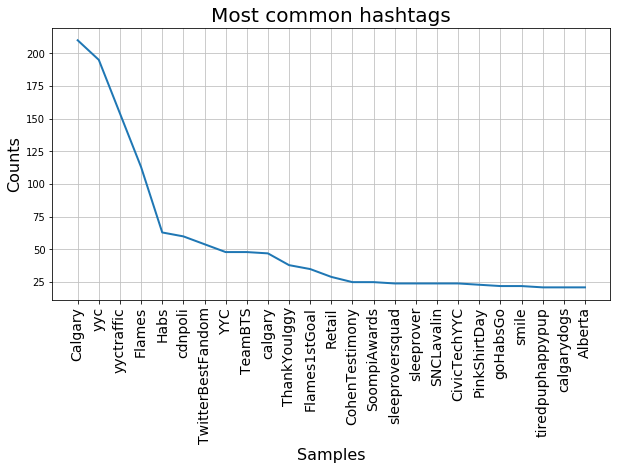

In [19]:
plt.figure(figsize=(10,5)) # plot size
plt.title("Most common hashtags", size = 20)
plt.xlabel("Hashtag", size = 16)
plt.ylabel("Counts", size = 16)
plt.xticks(fontsize=14) ## Change font for x axis labels
freque_dist.plot(25)

We will do the same steps for the user_string column:

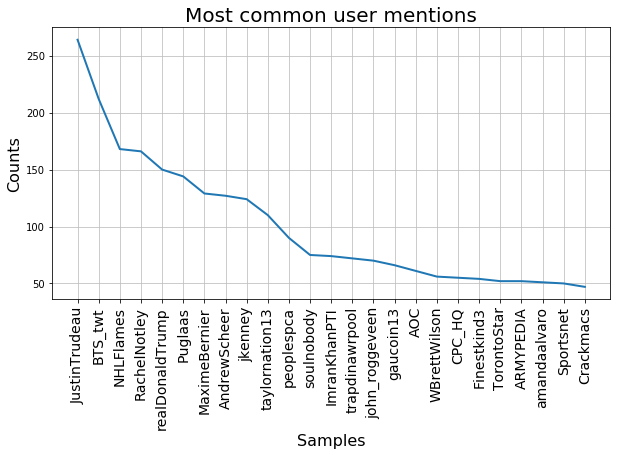

In [20]:
all_users=" ".join([i for i in tweets_cleaned['user_string']]).split()
plt.figure(figsize=(10,5))
plt.title("Most common user mentions", size=20)
plt.xlabel("Tagged User", size=16)
plt.ylabel("Number of tags", size =16)
plt.xticks(fontsize=14)
fd = nltk.FreqDist(all_users)
fd.plot(25)

#### How many users talked about the most commonly mentioned user? 
We will use [str.contains()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.str.contains.html) function to get rows containing specific string:
> tweets_cleaned['user_string'].str.contains("JustinTrudeau")

In [21]:
print("Number of tweets with the most common user mention 'JustinTrudeau':",
      len(tweets_cleaned[tweets_cleaned['user_string'].str.contains("JustinTrudeau")]['name']))

print("Number of users using the most common user mention 'JustinTrudeau':",
      len(tweets_cleaned[tweets_cleaned['user_string'].str.contains("JustinTrudeau")]['name'].unique()))

Number of tweets with the most common user mention 'JustinTrudeau': 263
Number of users using the most common user mention 'JustinTrudeau': 96


By contrast, how does this compare to the second most commonly mentioned user? Check the bar chart above and find out how many users mentioned it. 


In [22]:
print("Number of tweets with the most common user mention 'BTS_twt':",
      len(tweets_cleaned[tweets_cleaned['user_string'].str.contains("BTS_twt")]['name']))

print("Number of users using the most common user mention 'BTS_twt':",
      len(tweets_cleaned[tweets_cleaned['user_string'].str.contains("BTS_twt")]['name'].unique()))

Number of tweets with the most common user mention 'BTS_twt': 195
Number of users using the most common user mention 'BTS_twt': 4


#### Which users used the most number of user mentions?

In [23]:
print("Maximum number of user mentions:",
      max(tweets_cleaned['user_string'].str.split().str.len()),
      "made by  ",
      tweets_cleaned.loc[tweets_cleaned['user_string'].str.split().str.len() == tweets_cleaned['user_string'].str.split().str.len().max(), 'name'].unique())

Maximum number of user mentions: 14 made by   ['chillidog']


#### Exercise4 - try subsetting  data by hour ( for example between 9 and 10 am) and plot most common hashtags or user_mentions
Hint: to select only data between 9 and 10 am use  dt.hour==9 condition 
>tweets_cleaned[tweets_cleaned["created_at_date"].dt.hour==9] 

In [24]:
## type something here


######################

### `User_location` column

In [25]:
print("Number of unique user locations:", len(tweets_cleaned["user_location"].unique()), "\n")
print(tweets_cleaned["user_location"].unique())

Number of unique user locations: 1000 

['Canada' 'Calgary, AB ' 'Mars, Canada'
 'I mute with reckless abandon. #INTJ' nan 'Calgary, Alberta'
 '5819 Bowness Road N.W.' 'Montreal, Canada' 'CALGARY ALBERTA CANADA'
 'Calgary Alberta Canada' 'Calgary' 'Alor London' 'Calgary, AB'
 'The Great White North🇨🇦' 'Calgary, Alberta Canada'
 'ÜT: 49.872516,-112.800809' 'Montreal' 'ÜT: 49.825965,-113.395981'
 'USA  Not Currently Wandering' 'Saskatoon, Sk, Treaty 6'
 'Montréal, Québec' 'Treaty 7, Alberta' 'Seabrook, NH' 'Edmonton, AB'
 'Calgary AB Canada' 'Calgary ' 'Calgary Alberta' 'Alberta, Canada'
 'here & there' '4th Watcher ' 'Ottawa, Ontario' 'Calgary, AB, Canada'
 'Jericho, NY' 'Calgary, Alberta, Canada' '-/media/' 'calgary' 'canada '
 'Calgary, Ab' 'Barrie, Ontario' 'Quebec, Canada' 'Around.'
 'Calgary, Canada' 'calgary, alberta' 'Bellingham, WA born' 'Toronto'
 'Montréal' 'YYC' 'Canada ' '🇨🇦🇨🇦🇨🇦' 'Connaught, Calgary' 'Worldwide'
 ' Calgary' 'Prosser, WA' 'Calgary Canada' 'Swift Current, Sask

There are 1000 unique user_locations. These are locations that are entered by users in the profile and open to pretty much any input, which is why we see some odd locations in there. Not sure if this is overly interesting right now. Let's look into latitude/longitude instead.

### `Latitude/longitude` columns
We will subset data by day (to make it faster) and plot tweets that have coordinates on a map.

How are latitude/longitude added to a tweet? Do all tweets have them? How reliable is this data source? A few things to keep in mind as we go through this...

In [26]:
print("Total number of tweets: ",tweets_cleaned.shape[0])
tweets_have_location=tweets_cleaned[tweets_cleaned["longitude"].notnull()]
print("Number of tweets having location data: ",tweets_have_location.shape[0])

Total number of tweets:  27006
Number of tweets having location data:  2388


In [27]:
tweets_subset_march2=tweets_have_location.loc[tweets_have_location["created_at_date"].dt.day==2]
print("Number of tweets having location data for March 2: ",tweets_subset_march2.shape[0])

Number of tweets having location data for March 2:  345


We can plot the location data on a map and use the library [folium](https://github.com/python-visualization/folium). We will iterate through each row in the December 18 subset of data and add the coordinates to the map where they exist. 

This can be accomplished using the [iterrrows()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html) function to iterate through dataframe rows:

In [28]:
calgary_coords = [51.0486, -114.0708] # Calgary coordinates, (where we are going to center the map)
my_map = folium.Map(location = calgary_coords, zoom_start = 13)

for index,row in tweets_subset_march2.iterrows(): 
        folium.Marker([row["longitude"], row["latitude"]]).add_to(my_map) 
my_map

It looks like these locations are in line with what we expected. The highest distribution falls within the downtown core and if you scroll out, you'll notice that the scraper seems to have done a good job limiting the collected tweets to roughly Alberta.

#### Exercise5: try subsetting by user mention (e.g "calgarylibrary") and  plot tweets on a map
Hint: use str.contains() function applied to tweets_have_location['user_string'] colum:
>tweets_have_location.loc[tweets_have_location['user_string'].str.contains("your_search_word")]

In [38]:
### type something here


######################

### `Screen_name` column

Let's look at some summary stats.

In [39]:
print("Total number of tweets: ",tweets_cleaned.shape[0])
print("Total number of users: ",tweets_cleaned['screen_name'].unique().shape[0])
print("Top 20 most active users:")
tweets_cleaned["screen_name"].groupby(tweets_cleaned["screen_name"]).count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)#.plot(kind="bar")

Total number of tweets:  27006
Total number of users:  3895
Top 20 most active users:


,screen_name,count
1720,Sexyshorty081,673
15,311calgary,484
1931,ThuyDao91222753,428
1943,TommyChong840,425
114,Aliya313,395
2623,ericcbarnes,381
2398,chevymo,328
695,Ember_Daily,317
906,IanIdeaman7,317
3214,montrealdesign,295


### Save data to csv
We have done a whole lot of exploring and some additonal data wrangling that has changed the data, so let's save an updated dataset to csv.

In [40]:
tweets_cleaned.to_csv('alberta_tweets_cleaned_feb_25_1.csv',index=False)

##  Conclusion

We've done some data exploration in order to try to understand the data better. Our time spent on each column depended on how complex the data is each column. Since we will continue to work with the text data, that is where we started and spent most of our time working with. 

Take-aways: 
* Data exploration helps provide a sense of the data that is there and often reveals interesting trends and patterns 
* Always consider both exploring the data using summary statistics along with data visualizations
* Think about what you would expect the data to look like going into it and determine whether your assumptions hold up. If not, why not? This could tell you important things about your data. 
* Subject matter expertise is invaluable in data science, including in the exploration phase. A solid understanding of how Twitter is used, or working with someone who does, can often quickly resolve questions that could otherwise take hours to answer. 

Next, we will go deeper into natural language processing, will  build topic models  and do sentiment analysis

## Answers

#### Exercise1:

In [32]:
stopwords.add("Calgary")
stopwords.add("Alberta")

#### Exercise2:

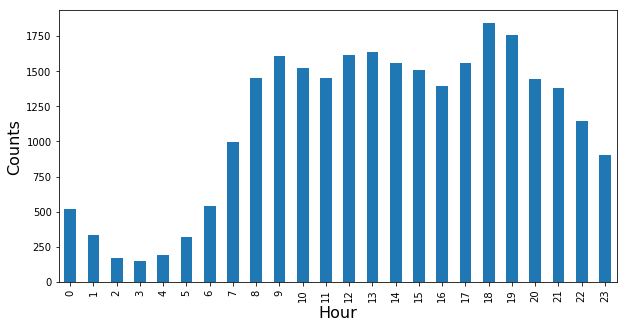

In [33]:
ax = tweets_cleaned["created_at_date"].groupby([tweets_cleaned["created_at_date"].dt.hour]).count().plot(kind="bar", figsize=(10,5))
ax.set_xlabel("Hour", size =16)
ax.set_ylabel("Counts", size=16)
plt.show()

#### Exercise3:

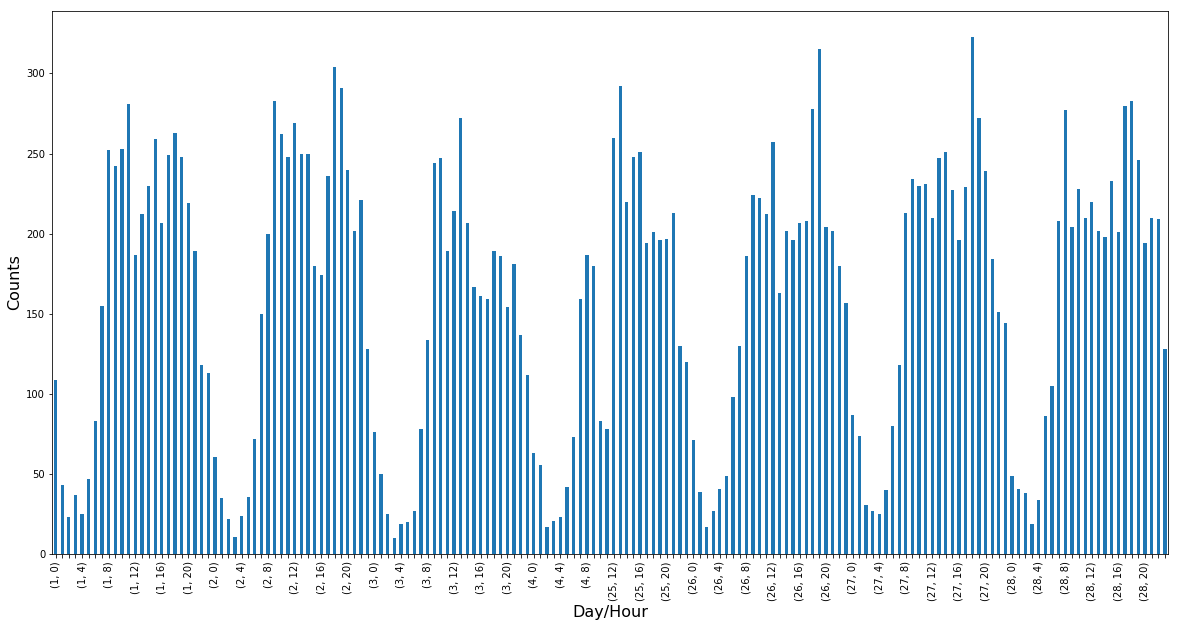

In [34]:
ax = tweets_cleaned["created_at_date"].groupby([tweets_cleaned["created_at_date"].dt.day,tweets_cleaned["created_at_date"].dt.hour]).count().plot(kind="bar", figsize=(20,10))
ax.set_xlabel("Day/Hour", size =16)
ax.set_ylabel("Counts", size=16)
##To display every 4th tick for x axis:
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % 4 != 0:
        label.set_visible(False)
plt.show()

#### Exercise4:

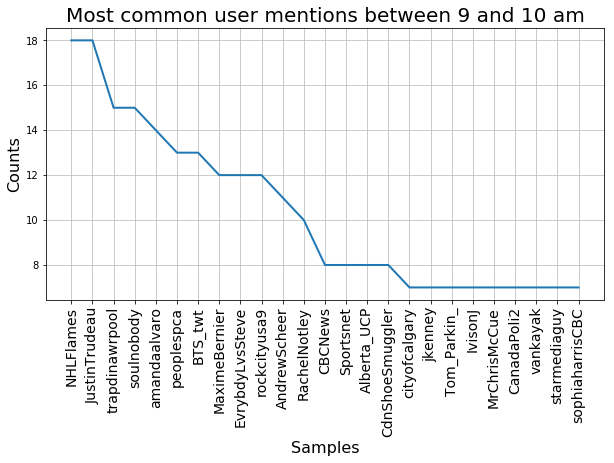

In [35]:
tweets_cleaned_9 = tweets_cleaned[tweets_cleaned["created_at_date"].dt.hour==9]

all_users=" ".join([i for i in tweets_cleaned_9['user_string']]).split()
plt.figure(figsize=(10,5))
plt.title("Most common user mentions between 9 and 10 am", size=20)
plt.xlabel("Tagged User", size=16)
plt.ylabel("Number of tags", size =16)
plt.xticks(fontsize=14)
fd = nltk.FreqDist(all_users)
fd.plot(25)

#### Exercise5:

In [36]:
tweets_subset_library=tweets_have_location.loc[tweets_have_location['user_string'].str.contains("calgarylibrary")]

my_map = folium.Map(location = calgary_coords, zoom_start = 13)

for index,row in tweets_subset_library.iterrows():  
        folium.Marker([row["longitude"], row["latitude"]]).add_to(my_map) 
my_map